In [1]:
import sys
sys.path.append("../")
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
from src.embedding import new_HeatGeo
import scanpy as sc
from src.dataset import SwissRoll
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/network/scratch/g/guillaume.huguet/projects/metric_embeddings/data/worldmap.csv")
df = df.sample(2000)

In [3]:
data = df[['x', 'y']].to_numpy()
labels = pd.Categorical(df['continent']).codes
emb_op = new_HeatGeo(knn=18, tau=0.5, order=20, filter_method="euler")
emb = emb_op.fit_transform(data)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 2
  warnings.warn(


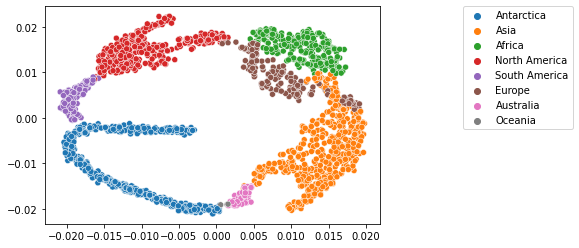

In [4]:
sns.scatterplot(x=emb[:, 0], y=emb[:, 1], c=labels, hue=df['continent'])
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 2
  warnings.warn(


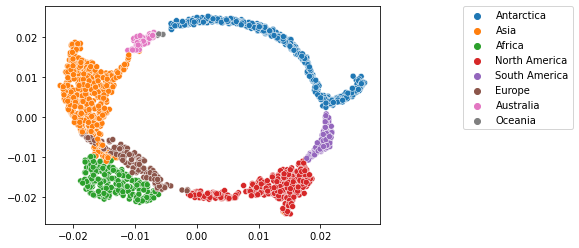

In [5]:
emb_op = new_HeatGeo(knn=18, tau=0.5, order=20, filter_method="mar", n_tau=5, tau_min=0.05, tau_max=10)
emb = emb_op.fit_transform(data)
sns.scatterplot(x=emb[:, 0], y=emb[:, 1], c=labels, hue=df['continent'])
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

/home/mila/g/guillaume.huguet/.local/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 2
  warnings.warn(


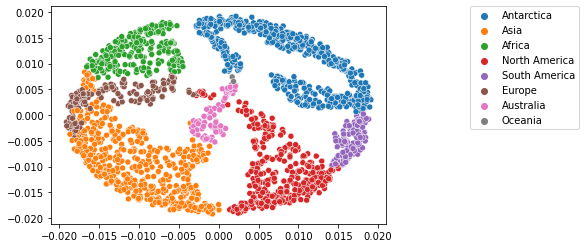

In [7]:
emb_op = new_HeatGeo(knn=18, tau=0.5, order=20, filter_method="mar", n_tau=5, tau_min=0.05, tau_max=1, scale_factor=0.5)
emb = emb_op.fit_transform(data)
sns.scatterplot(x=emb[:, 0], y=emb[:, 1], c=labels, hue=df['continent'])
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

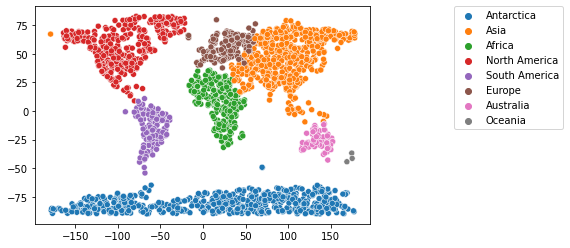

In [8]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], c=labels, hue=df['continent'])
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

In [18]:
ds = SwissRoll(n_points=1000, manifold_noise=0.1, width=1, random_state=42, rotate=False, rotate_dim=10)

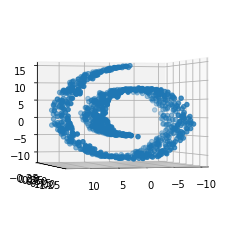

In [19]:
import matplotlib.pyplot as plt
# plot the 3d data plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds.X[:,0], ds.X[:,1], ds.X[:,2], cmap='Spectral')
#rotate the axes and update
ax.view_init(0, 75)
plt.show()

In [6]:
ds.X.shape

(100, 10)

In [7]:
ground_truth = ds.get_geodesic()

In [8]:
ground_truth.shape

(100, 100)

In [8]:
data, labels = phate.tree.gen_dla(n_branch=5, branch_length=500)

In [9]:
knn=5
anisotropy=0
decay=40
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)

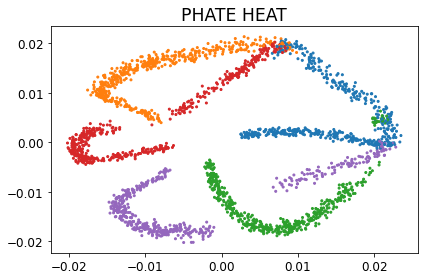

In [12]:
emb_phate_heat = EmbHeatPHATE(knn=knn)
emb_phate_heat.scatterplot(data,labels,title="PHATE HEAT", tau=10)

In [8]:
emb, labels_path = heat_op.geodesic_euc(data, [0,], [1300,],nsteps=40, euc_dim=150)

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


In [9]:
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))

<AxesSubplot:title={'center':'Heat-Geodesic path'}>

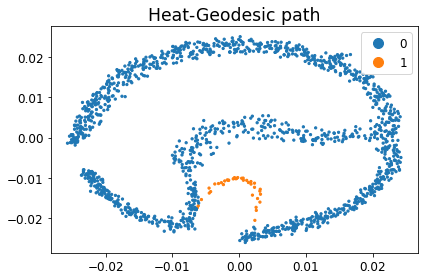

In [11]:
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


<AxesSubplot:title={'center':'Heat-Geodesic path'}>

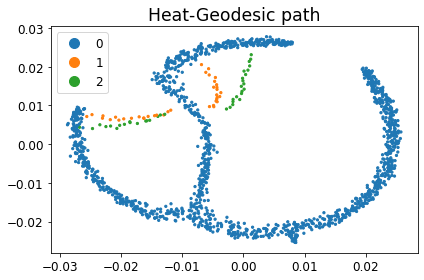

In [12]:
knn=5
anisotropy=0
decay=40
tau=20
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb, labels_path = heat_op.geodesic_euc(data, [0,50,], [1300,1400,],nsteps=40, euc_dim=150, tau=tau)
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


<AxesSubplot:title={'center':'Heat-Geodesic path'}>

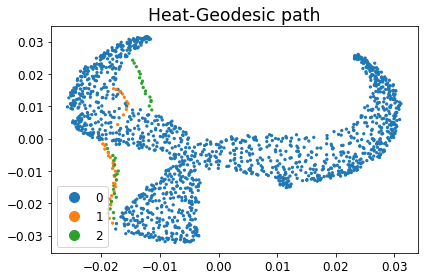

In [13]:
knn=50
anisotropy=0
decay=40
tau=20
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb, labels_path = heat_op.geodesic_euc(data, [0,50,], [1300,1400,],nsteps=40, euc_dim=150, tau=tau)
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


<AxesSubplot:title={'center':'Heat-Geodesic path'}>

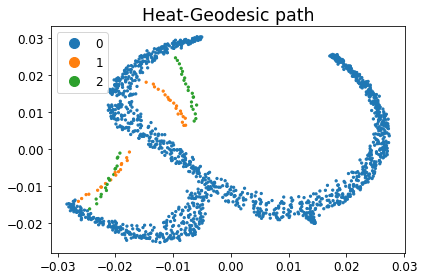

In [14]:
knn=5
anisotropy=0
decay=40
tau=100
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb, labels_path = heat_op.geodesic_euc(data, [0,50,], [1300,1400,],nsteps=40, euc_dim=150, tau=tau)
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


<AxesSubplot:title={'center':'Heat-Geodesic path'}>

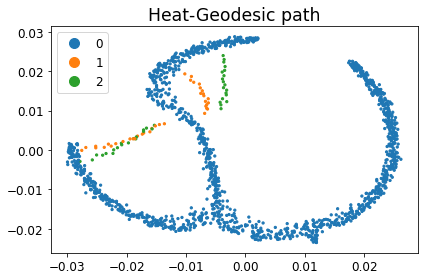

In [15]:
knn=5
anisotropy=1
decay=40
tau=20
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb, labels_path = heat_op.geodesic_euc(data, [0,50,], [1300,1400,],nsteps=40, euc_dim=150, tau=tau)
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

In [17]:
pbmc = sc.datasets.pbmc3k_processed()
data = pbmc.X
labels = pbmc.obs["louvain"]

100%|██████████| 23.5M/23.5M [00:00<00:00, 49.3MB/s]


In [18]:
knn=5
anisotropy=0
decay=40
tau=0.5
heat_op = EmbHeatGeo(knn=knn, anisotropy=anisotropy, decay=decay)
emb, labels_path = heat_op.geodesic_euc(data, [0,], [1500,],nsteps=40, euc_dim=100, tau=tau)
labels_emb = np.concatenate((np.zeros_like(labels), labels_path))
scprep.plot.scatter2d(emb, c=labels_emb, title="Heat-Geodesic path")

/home/mila/g/guillaume.huguet/.conda/envs/ManifoldOT/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (2638, 1838) is expensive. Consider setting n_pca.
  warnings.warn(


Changed MDS solver to `smacof`, `sge` not implemented for 2<dim.


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''